In [13]:
import numpy as np
from scipy.integrate import solve_bvp
from matplotlib import pyplot as plt

In [14]:
# On arakis, so elliptical orbits
# Ellipse is a parametric of t
def ellipse(t: np.ndarray, A: float=1, B: float=1) -> np.ndarray:
    """Get ellipse over time.

    Args:
        t (np.ndarray): The timeseries of timesteps.
        A (float, optional): X axis stretch factor. Defaults to 1.
        B (float, optional): Y axis stretch factor. Defaults to 1.

    Returns:
        np.ndarray: _description_
    """
    return np.array([A * np.cos(t), B * np.sin(t)])

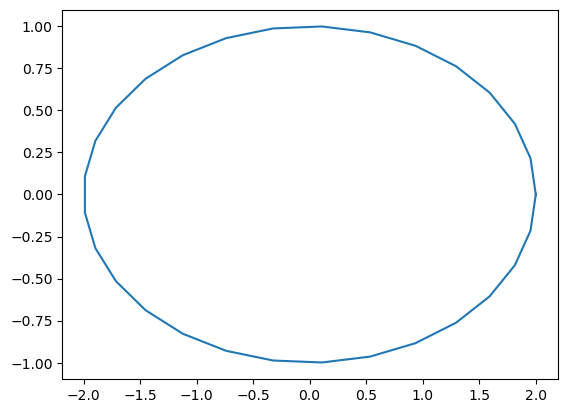

In [15]:
e = ellipse(np.linspace(0, 2*np.pi, 30), 2, 1)
plt.plot(e[0,:], e[1,:])

$F = m_{ss} * [m_other/(dist to other ** 2)]$

In [16]:
# State equation of the guild navigator's ship trying to get to Arakis and he's h*** on spice
# F = \sigma (gravity forces of each planet) 

def upd_ss(x: np.ndarray) -> np.ndarray:
    F = np.ndarray(
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
        [0,0,0,0,0,0],
    )
    x = F@x
    return x

# F, A, B, Q, R, M
def LQR_formulation():
    pass #TODO first get the usual mechanics

In [17]:
# hello everyone

In [192]:
G = 6.674e-11
# this stores a list of planets with each planet's mass and position with [mass, pos_x, pos_y]
planets = [(50, lambda t:np.ones_like(t)*-1, lambda t:np.ones_like(t)*-1), (10, lambda t: np.ones_like(t)*10, lambda t: np.ones_like(t)*10), (1000, lambda t:np.ones_like(t)*0, lambda t:np.ones_like(t)*5)]
T = 100000

def norm(sx, sy, px, py):
        return ((sx-px)**2 + (sy-py)**2)**(1/2)

def best_path(planets, T, savefig=False, filename=None):
    '''This take you from the first planet to the second planet'''
    
    def ode(t, y):
        '''
        sx: spaceship x position
        sy: spaceship y position
        dsx: spaceship x velocity
        dsy: spaceship y velocity
        p1, p2, p3, p4: costate vars
            '''
        sx, sy = y[0], y[1]
        dsx, dsy = y[2], y[3]
        p1, p2, p3, p4 = y[4], y[5], y[6], y[7]

        ddsx = G * sum([mp*(sx-px(t))/(norm(sx, sy, px(t), py(t)))**3 for mp, px, py in planets] + p3/2)
        ddsy = G * sum([mp*(sy-py(t))/(norm(sx, sy, px(t), py(t)))**3 for mp, px, py in planets] + p4/2)

        dp1 = -p3*(G * sum([mp/norm(sx, sy, px(t), py(t))**3 - 3*mp*(sx - px(t))**2/norm(sx, sy, px(t), py(t))**5 for mp, px, py in planets]))
        dp2 = -p4*(G * sum([mp/norm(sx, sy, px(t), py(t))**3 - 3*mp*(sy - py(t))**2/norm(sx, sy, px(t), py(t))**5 for mp, px, py in planets]))

        dp3 = -p1
        dp4 = -p2

        return np.array([dsx, dsy, ddsx, ddsy, dp1, dp2, dp3, dp4])

    def bc(ya, yb):
        return np.array([ya[0]-planets[0][1](0), ya[1]-planets[0][2](0), ya[2]-0, ya[3], yb[0]-planets[1][1](T), yb[1]-planets[1][2](T), yb[2], yb[3]])

    t = np.linspace(0, T, 500)
    y_guess = np.zeros((8, t.size))

    soln = solve_bvp(ode, bc, t, y_guess)

    sx = soln.sol(t)[0]
    sy = soln.sol(t)[1]

    fig, (ax1, ax2) = plt.subplots(2,1,gridspec_kw={'height_ratios':[2,1]})

    # plt.figure(figsize=(8,12))
    # plt.subplot(211)
    ax1.plot(sx, sy, label='Optimal Path')
    for i, (mp, px, py) in enumerate(planets):
        ax1.plot(px(t), py(t), label=f'planet {i+1}', linewidth=1)

    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Optimal Path')
    ax1.legend()
    

    # plt.subplot(212)
    ux = soln.sol(t)[6]/2
    uy = soln.sol(t)[7]/2
    ax2.plot(t, ux, label='control in x direction')
    ax2.plot(t, uy, label='control in y direction')
    ax2.set_title('Optimal Control')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Acceleration')
    ax2.legend()
    plt.tight_layout()
    if savefig:
        plt.savefig(filename, dpi=300)

    
    plt.show()

We saw that with T = 100000 we got a cool graphic

/var/folders/t7/fm4bzyds14x6dsdw4f5c82dm0000gn/T/ipykernel_94874/2102479631.py:24: RuntimeWarning: invalid value encountered in true_divide
  ddsx = G * sum([mp*(sx-px(t))/(norm(sx, sy, px(t), py(t)))**3 for mp, px, py in planets] + p3/2)
/var/folders/t7/fm4bzyds14x6dsdw4f5c82dm0000gn/T/ipykernel_94874/2102479631.py:25: RuntimeWarning: invalid value encountered in true_divide
  ddsy = G * sum([mp*(sy-py(t))/(norm(sx, sy, px(t), py(t)))**3 for mp, px, py in planets] + p4/2)
/var/folders/t7/fm4bzyds14x6dsdw4f5c82dm0000gn/T/ipykernel_94874/2102479631.py:27: RuntimeWarning: divide by zero encountered in true_divide
  dp1 = -p3*(G * sum([mp/norm(sx, sy, px(t), py(t))**3 - 3*mp*(sx - px(t))**2/norm(sx, sy, px(t), py(t))**5 for mp, px, py in planets]))
/var/folders/t7/fm4bzyds14x6dsdw4f5c82dm0000gn/T/ipykernel_94874/2102479631.py:27: RuntimeWarning: invalid value encountered in true_divide
  dp1 = -p3*(G * sum([mp/norm(sx, sy, px(t), py(t))**3 - 3*mp*(sx - px(t))**2/norm(sx, sy, px(t), py(t))

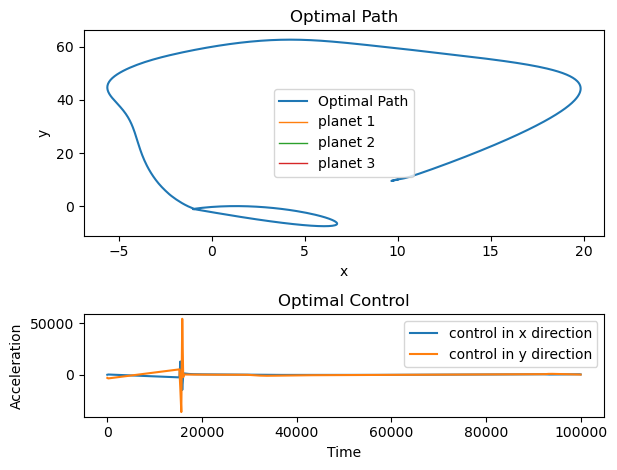

In [193]:
best_path(planets, T, savefig=True, filename='test.png')

/var/folders/t7/fm4bzyds14x6dsdw4f5c82dm0000gn/T/ipykernel_94874/2102479631.py:24: RuntimeWarning: invalid value encountered in true_divide
  ddsx = G * sum([mp*(sx-px(t))/(norm(sx, sy, px(t), py(t)))**3 for mp, px, py in planets] + p3/2)
/var/folders/t7/fm4bzyds14x6dsdw4f5c82dm0000gn/T/ipykernel_94874/2102479631.py:25: RuntimeWarning: invalid value encountered in true_divide
  ddsy = G * sum([mp*(sy-py(t))/(norm(sx, sy, px(t), py(t)))**3 for mp, px, py in planets] + p4/2)
/var/folders/t7/fm4bzyds14x6dsdw4f5c82dm0000gn/T/ipykernel_94874/2102479631.py:27: RuntimeWarning: divide by zero encountered in true_divide
  dp1 = -p3*(G * sum([mp/norm(sx, sy, px(t), py(t))**3 - 3*mp*(sx - px(t))**2/norm(sx, sy, px(t), py(t))**5 for mp, px, py in planets]))
/var/folders/t7/fm4bzyds14x6dsdw4f5c82dm0000gn/T/ipykernel_94874/2102479631.py:27: RuntimeWarning: invalid value encountered in true_divide
  dp1 = -p3*(G * sum([mp/norm(sx, sy, px(t), py(t))**3 - 3*mp*(sx - px(t))**2/norm(sx, sy, px(t), py(t))

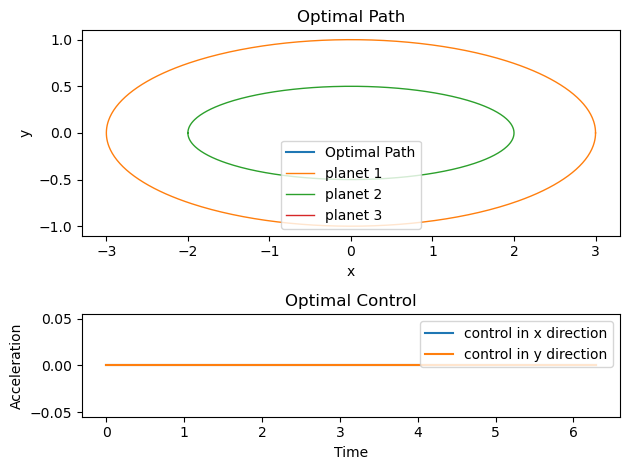

In [199]:
planet1 = (100, lambda t:3*np.cos(t), lambda t:np.sin(t))
planet2 = (200, lambda t:2*np.cos(t+np.pi), lambda t:.5*np.sin(t+np.pi))
planet3 = (1000, lambda t:np.zeros_like(t), lambda t:np.zeros_like(t))
planets = [planet1, planet2, planet3]
best_path(planets, np.pi*2)